# Veriye İlk Bakış

In [1]:
import seaborn as sns
planets= sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Veri setinin hikayesi nedir?

Nasıl Oluşturuldu, ne tür kriterler baz alındı?

In [2]:
df=planets.copy()

In [3]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [4]:
#Veri seti yapısal bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [6]:
#Object tipinin Categoric' e dönüştürülmesi

import pandas as pd
df.method=pd.Categorical(df.method)

In [7]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Setinin Betimlenmesi

In [8]:
import seaborn as sns
planets= sns.load_dataset("planets")
df=planets.copy()

In [9]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [10]:
df.shape

(1035, 6)

In [11]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [12]:
#Eksik gözlemleri göz ardı eder ve kategorik değişkenleri dışarıda bırakır.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [13]:
#Kategorik olanları da dahil eder
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


In [14]:
#Hiç eksik gözlem var mı?
df.isnull().values.any()

True

In [15]:
#Hangi değişkende kaçar tane
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [16]:
#Eksik değerler yerine 0/ortalama değeri basılabilir
#
#df["degisken_ad"].fillna(0,inplace=True)

In [17]:
#Ortalama değerle doldurmak için
#df["orbital_period"].fillna(df.orbital_period.mean(), inplace=True)

In [18]:
#Tüm eksik değerler yerine ortalama değerlerin atanması
df.fillna(df.mean(), inplace=True)

C:\Users\ahmet\AppData\Local\Temp/ipykernel_12268/3790043893.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [19]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [20]:
#Veri setinin bozulmamış halini tekrar ele alıyoruz
planets= sns.load_dataset("planets")
df=planets.copy()

In [21]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## Kategorik Değişken Özetleri

In [22]:
import seaborn as sns
planets= sns.load_dataset("planets")
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# Sadece Kategorik Değişkenler ve Özetleri

In [23]:
#İstenilen tipe göre veri çekmek için
#Kategorik için category
kat_df = df.select_dtypes(include=["object"])

In [24]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


# Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [25]:
#Kategorik değişkenin sınıf bilgileri
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [26]:
#Sınıfları saydırmak
kat_df["method"].value_counts().count()

10

# Kategorik Değişkenin Sınıflarından Frekansları

Yani kaçar tane

In [27]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

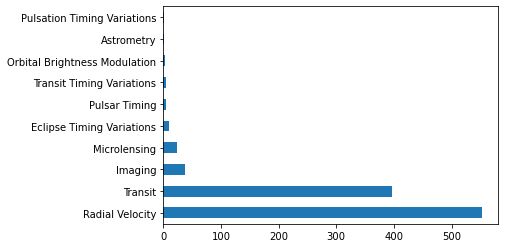

In [28]:
#Barh: sütun bilgisi
df["method"].value_counts().plot.barh();

# Sürekli Değişken Özetleri

In [29]:
import seaborn as sns
planets= sns.load_dataset("planets")
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [30]:
#Sadece sürekli değişkenlerin seçimi
df_num = df.select_dtypes(include=["float64","int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [31]:
#Sürekli değişkenlerin betimsel istatistiği
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [32]:
#Değişkenler üzerine betimlemek
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [33]:
print("Ortalama           :"+str(df_num["distance"].mean()))
print("Dolu Gözlem Sayıcı :"+str(df_num["distance"].count()))
print("Maksimum Değer     :"+str(df_num["distance"].max()))
print("Minimum Değer      :"+str(df_num["distance"].min()))
print("Medyan             :"+str(df_num["distance"].median()))
print("Standart sapma     :"+str(df_num["distance"].std()))

Ortalama           :264.06928217821786
Dolu Gözlem Sayıcı :808
Maksimum Değer     :8500.0
Minimum Değer      :1.35
Medyan             :55.25
Standart sapma     :733.1164929404422


## Veri Seti Hikayesi

# Dağılım Grafikleri

Sürekli(Sayısal) / Kategorik Değişkenlerin Dağılımı Görsel Teknik ile İfade etme

Barplot(Sütun Grafik) : Kategorik Değişkenleri Görselleştirmek İçin Kullanılır

Veri Seti Hikayesi

price    : Dolar cinsinde fiyat(326-18,823)

carat    : Ağırlık(0.2-5.01)

cut      : Kalite (Fair, Good, Very Good, Premium, Ideal)

color    : Renk (form J(worst) to D (best))

clarity  : Temizlik, Berraklık (I1 (worst), SI1, SI2, VS2, VS1, VVS2, VVS2, IF (Best))

x        : Length in mm (0-10.74)

y        : Width in mm (0-58.9)

z        : Depth in mm (0-31.8)

depth    : Toplam derinlik Yüzdesi = z/mean(x,y) = 2*z/(x+y)(43-79)

table    : Elmasın en geniş noktasına göre genişliği (43-95)

In [34]:
import seaborn as sns
diamonds =sns.load_dataset('diamonds')
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Veri Setine İlk Bakış

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [37]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [38]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [39]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [40]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Şunu Farkediyoruz Kategorik Değişkenlerimiz Nominal
Değil Ordinal(Kötüden- İyiye)

In [41]:
#Ordinal Tanımlama
from pandas.api.types import CategoricalDtype

Cut İçin

In [42]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [43]:
#Cut 'ı ordinal yap
df.cut=df.cut.astype(CategoricalDtype(ordered=True))

In [44]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [45]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [46]:
cut_kategori = ["Fair","Good","Very Good","Premium","Ideal"]

In [47]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategori, ordered=True))

In [48]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

## Color İçin

In [49]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [50]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [51]:
color_kategori = ["J","I","H","G","F","E","D"]

In [52]:
df.color=df.color.astype(CategoricalDtype(categories=color_kategori, ordered=True))

In [53]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

## Clarity İçin

In [54]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [55]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [56]:
clarity_kategori = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

In [57]:
df.clarity=df.clarity.astype(CategoricalDtype(categories=clarity_kategori, ordered=True))

In [58]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

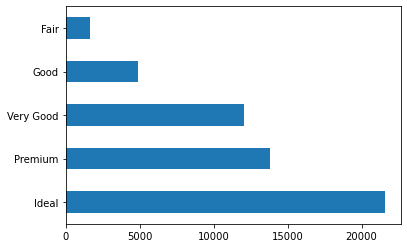

In [59]:
#barplot
df["cut"].value_counts().plot.barh();

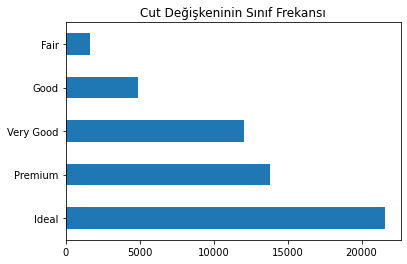

In [60]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansı");

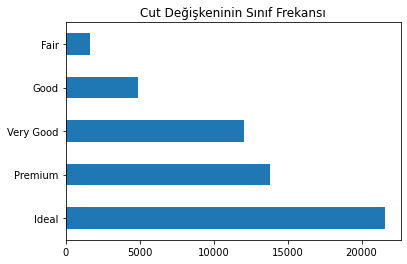

In [61]:
(df["cut"]
.value_counts()
.plot.barh()
.set_title("Cut Değişkeninin Sınıf Frekansı"));

<AxesSubplot:xlabel='cut'>

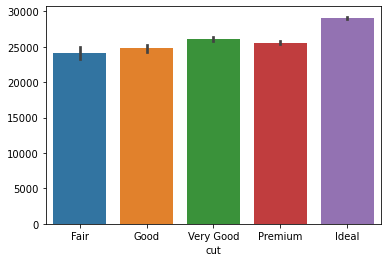

In [62]:
#Seaborn ile gerçekleştirim
sns.barplot(x="cut", y=df.cut.index, data=df)

<AxesSubplot:xlabel='color'>

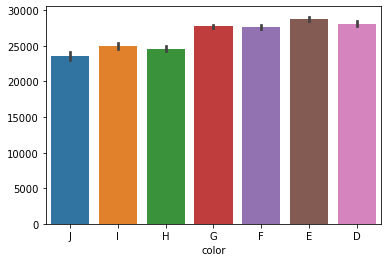

In [63]:
#Seaborn ile "color" gerçekleştirim
sns.barplot(x="color", y=df.color.index, data=df)

<AxesSubplot:xlabel='clarity'>

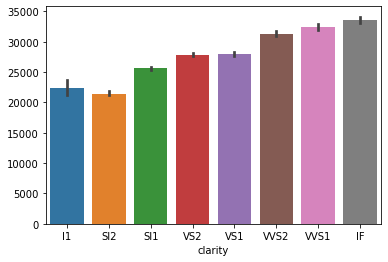

In [64]:
#Seaborn ile "color" gerçekleştirim
sns.barplot(x="clarity", y=df.clarity.index, data=df)

## Sütun Grafik Çaprazlama

In [65]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
cut_kategori = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategori, ordered=True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


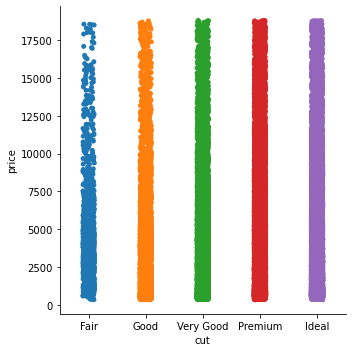

In [66]:
sns.catplot(x="cut", y="price", data=df);

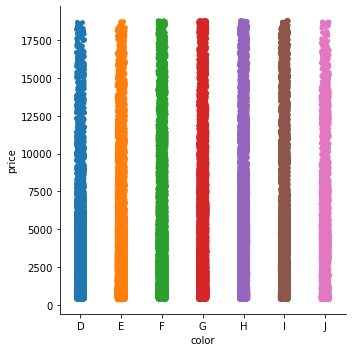

In [67]:
sns.catplot(x="color", y="price", data=df);

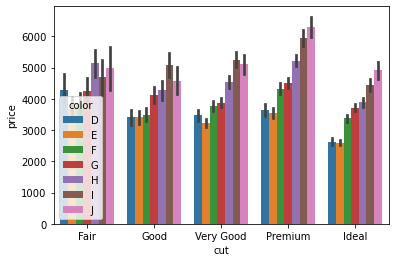

In [68]:
sns.barplot(x="cut", y="price", hue="color" , data=df);

In [71]:
#Cut ve color'a göre gurupla ve price a göre ortalama değer
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

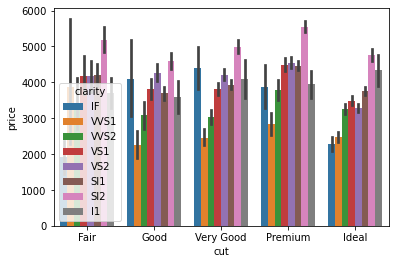

In [69]:
sns.barplot(x="cut", y="price", hue="clarity" , data=df);

## Histogram ve Yoğunluk Grafikleri

Sayısal değişkenler ve dağılımları için kullanılır

In [73]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


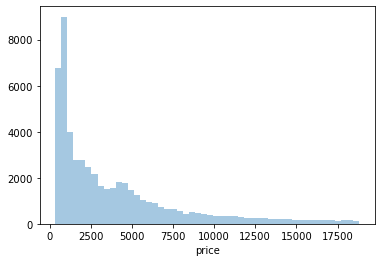

In [76]:
#Dağılım görselleştirmek için distplot
#Yoğunluk için kde parametresi kullanılır
sns.distplot(df.price, kde=False);

In [103]:
#?sns.distplot

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


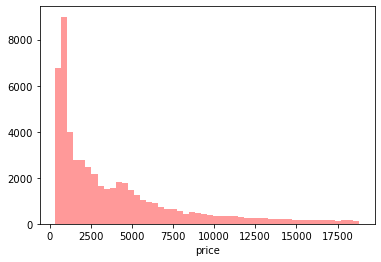

In [82]:
sns.distplot(df.price, color="red", kde=False);

In [90]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

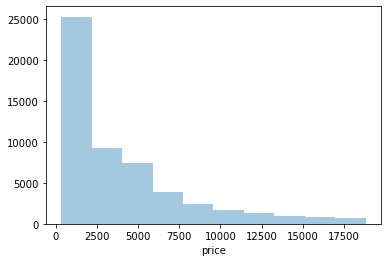

In [81]:
sns.distplot(df.price, kde=False, bins=10);

displot ile distplot'u karıştırma

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


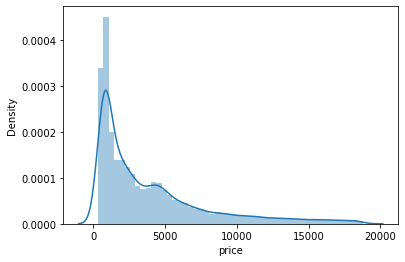

In [84]:
#Yoğunluk grafiği
sns.distplot(df.price);

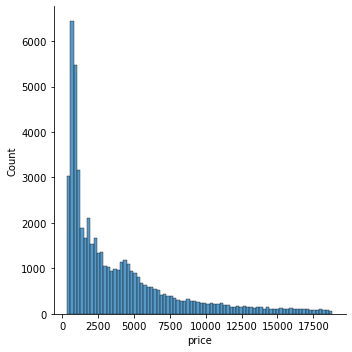

In [85]:
sns.displot(df.price);

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


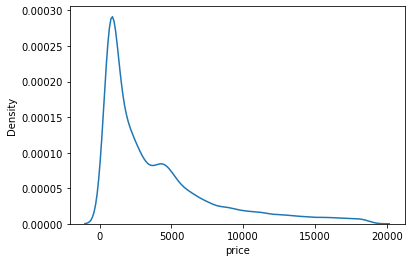

In [89]:
#Sadece yoğunluk grafiği
sns.distplot(df.price, hist=False);

<AxesSubplot:xlabel='price', ylabel='Density'>

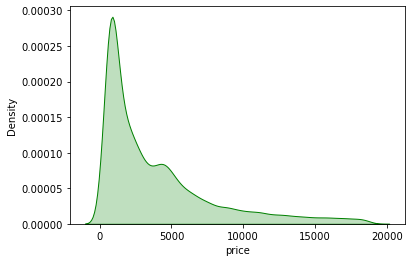

In [93]:
#Dağılım grafiğinin altı doldurularak
sns.kdeplot(df.price, color="green", shade=True)

## Çaprazlamalar


In [94]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


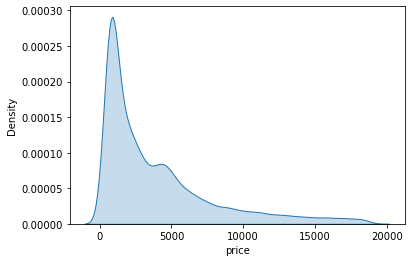

In [95]:
sns.kdeplot(df.price, shade=True);

Mavi alanın tepelerin sebebi nedir? Arka planında ne var?


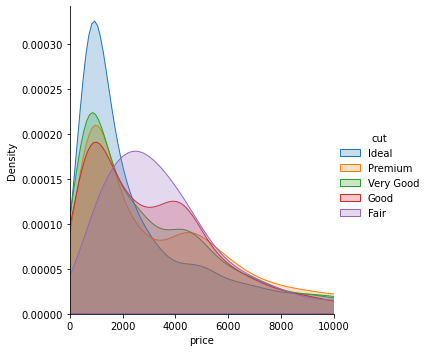

In [99]:
(sns.FacetGrid(df,                #FaceGrid=Eklenen boyutları bölerek gösterir
                hue="cut",        #Boyut ekleme
                height=5,         #
                xlim=(0,10000))   #X ekseni aralığı
        .map(sns.kdeplot,         #Cut değişkeninin sınıfları boyutları olarak ekleniyor
            "price",        
            shade=True)         
        .add_legend());           #cut değişkeninin kategilerini ekiyor

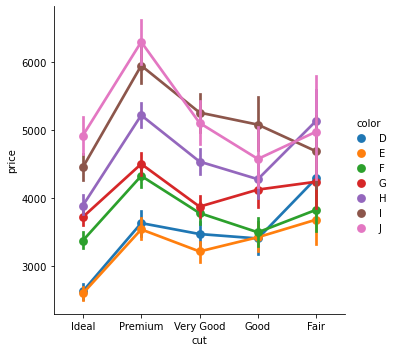

In [101]:
sns.catplot(x="cut",
            y="price",
            hue="color",
            kind="point", #tür
            data=df);

Fiyatın renk sınıflarınca değerlendirilmesi

## Boxplot

Sayısal (Sürekli) değişkenlerin gösteriminde kullanılır.

Veri seti hikayesi

total_bill  :yemeğin fiyatı(bahşiş ve vergi dahil)

tip         :Bahşiş

sex         :Ödeme yapan kişinin cinsiyeri(0=male, 1=female)

smoker      :Sigara içen (0=No, 1=Yes)

day         :Gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time        :Ne zaman? (0=Day, 1=Night)

size        :Grupta kaç kişi var?

In [102]:
import seaborn as sns
tips= sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [105]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [110]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [111]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [112]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Kutu Grafiğinin Oluşturulması

Boxplot

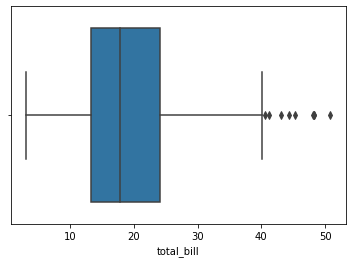

In [113]:
sns.boxplot(x=df["total_bill"]);

Soldan sağa; min değer/%25-20 / Ort çizgi medya/%75/ En sağdaki noktalı kısım max

Aykırı değer sağdaki çizgiden sonrası

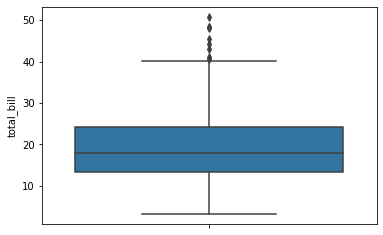

In [117]:
sns.boxplot(y= df["total_bill"], orient="v");

## Çaprazlama

Hangi günler daha fazla kazanıyoruz?

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


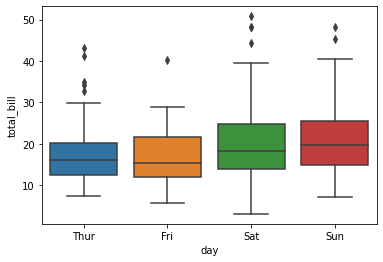

In [119]:
sns.boxplot(x="day",y="total_bill",data=df);

In [120]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Pazar günü daha az müşteri geldiği halde daha fazla para bıraktığı görülüyor.

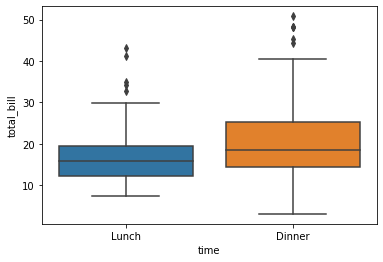

In [121]:
#Sabah mı akşam mı daha fazla kazanılıyor?
sns.boxplot(x="time",y="total_bill", data=df);

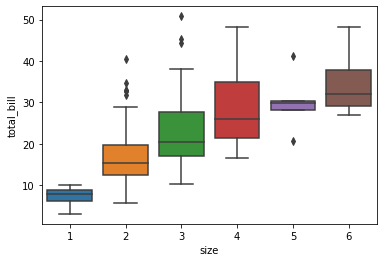

In [122]:
#Yemeğe gelen grupla kazanç durumunun gözlenmesi
sns.boxplot(x="size",y="total_bill", data=df);

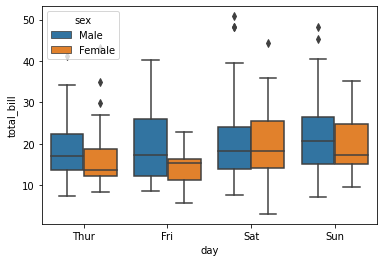

In [124]:
sns.boxplot(x="day",y="total_bill", hue="sex", data=df);

## Violin Grafiği

In [125]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


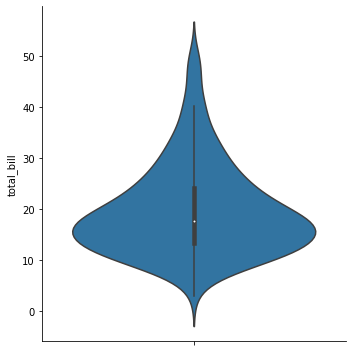

In [126]:
sns.catplot(y="total_bill", kind="violin", data=df);

## Violin Çaprazlama

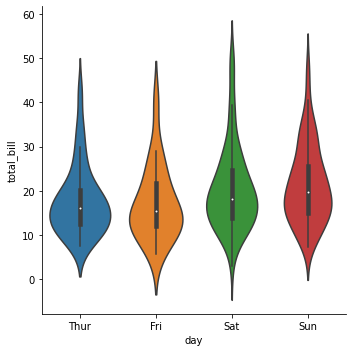

In [127]:
sns.catplot(x="day",y="total_bill", kind="violin", data=df);

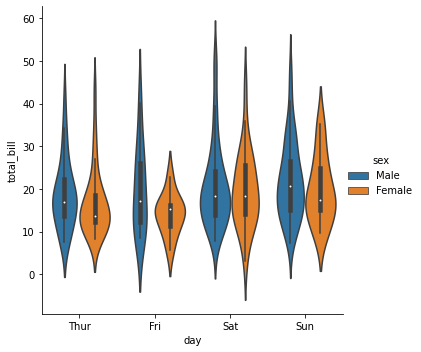

In [130]:
sns.catplot(x="day",y="total_bill",hue="sex", kind="violin", data=df);

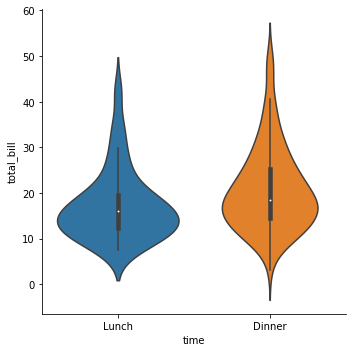

In [128]:
sns.catplot(x="time",y="total_bill", kind="violin", data=df);

## Korelasyon Grafikleri

Scatter Plot (Saçılım Grafiği): Sayısal Değişkenler (2 Değişken)

Değişkenler arası ilişkinin incelenmesi.

In [131]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


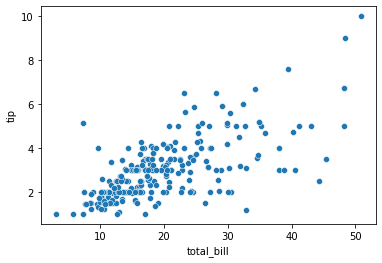

In [133]:
#Bahşiş ve hesap arasındaki ilişki
sns.scatterplot(x="total_bill",
                y="tip",
                data=df);

Ödenen hesap arttıkça bahşiş artışı mevcut

## Korelasyon Çaprazlama

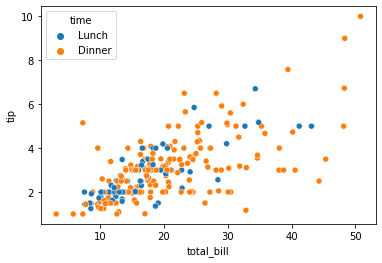

In [137]:
#Kategorik değişken boyut olarak eklenirse
sns.scatterplot(x="total_bill",
                y="tip",
                hue="time",
                data=df);

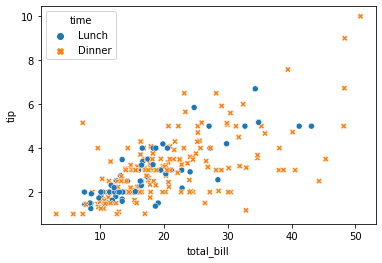

In [138]:
sns.scatterplot(x="total_bill",
                y="tip",
                hue="time",
                style="time",
                data=df);

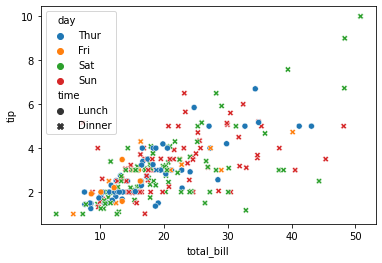

In [140]:
sns.scatterplot(x="total_bill",
                y="tip",
                hue="day",
                style="time",
                data=df);

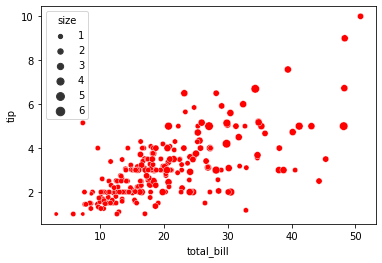

In [143]:
#Sürekli değişken boyut olarak eklersek
sns.scatterplot(x="total_bill",
                y="tip",
                size="size",
                color="red",
                data=df);

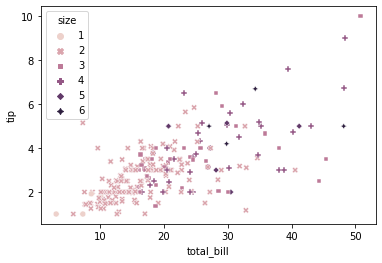

In [144]:
sns.scatterplot(x="total_bill",
                y="tip",
                hue="size",
                style="size",
                data=df);

## Doğrusal İlişkinin Gösterilmesi



In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

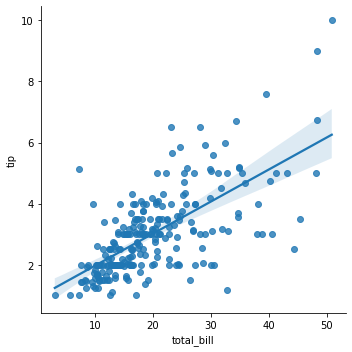

In [147]:
#Lineer Model
sns.lmplot(x="total_bill",y="tip", data=df);

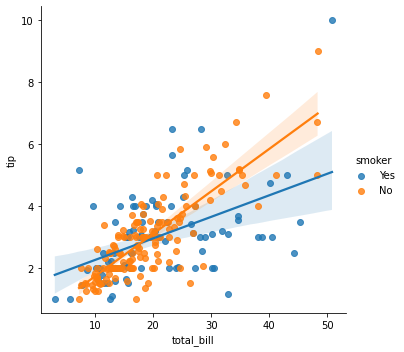

In [148]:
sns.lmplot(x="total_bill",y="tip",hue="smoker", data=df);

Sigara içmeyenler daha fazla bahşiş ve ödeme yapmış.

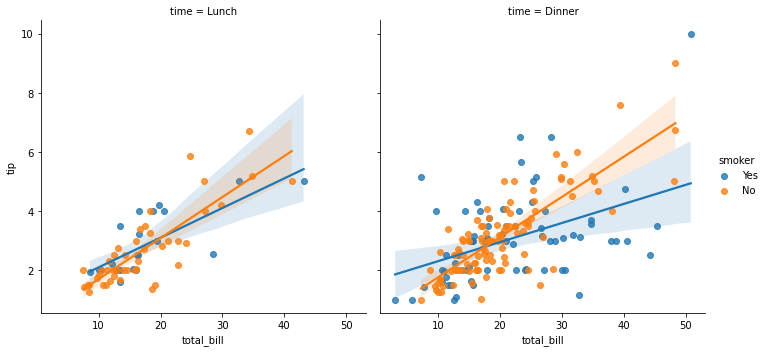

In [149]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time", data=df);

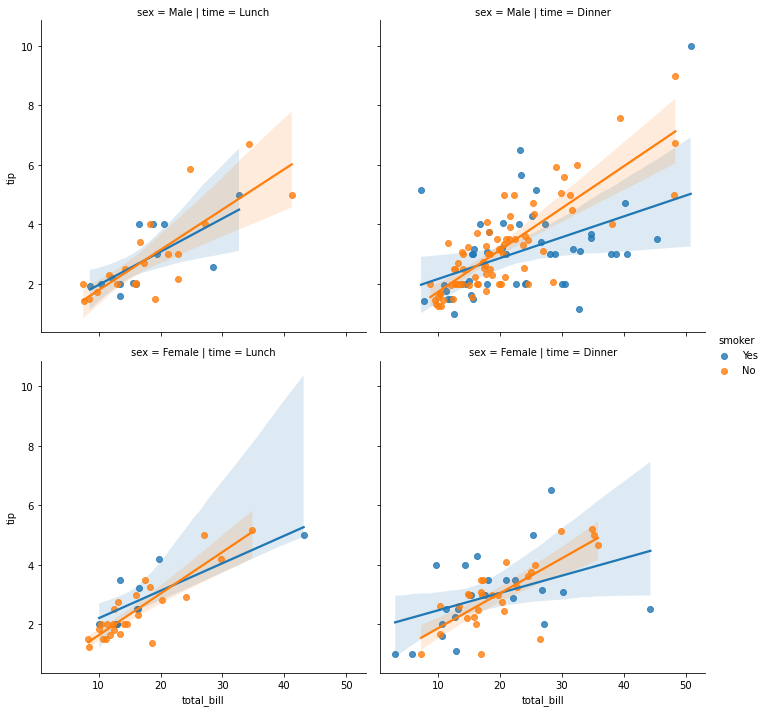

In [150]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex", data=df);

## Sacatter Plot Matrisi

Sayısal değişkenler arasındaki ilişkiyi incelenmesinde rol alır

In [1]:
import seaborn as sns;
iris = sns.load_dataset("iris")
df=iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


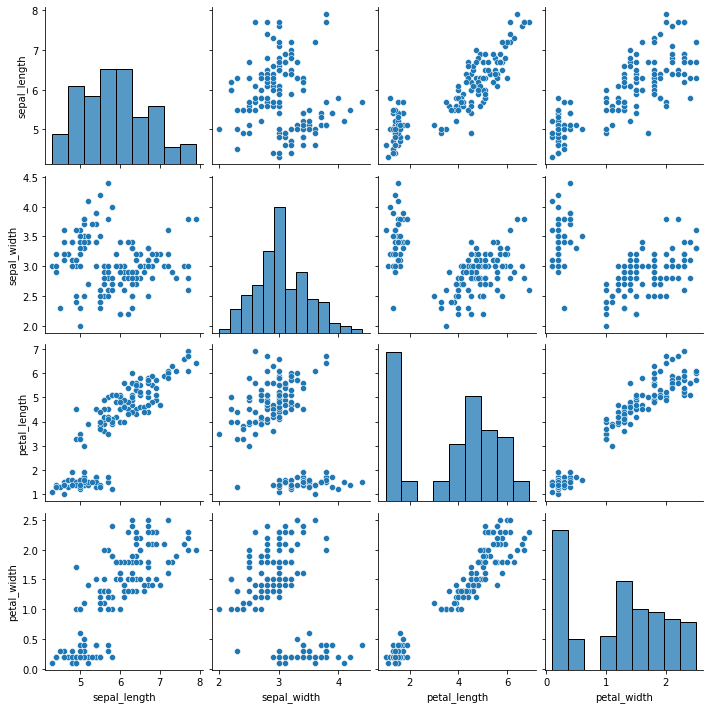

In [6]:
sns.pairplot(df);

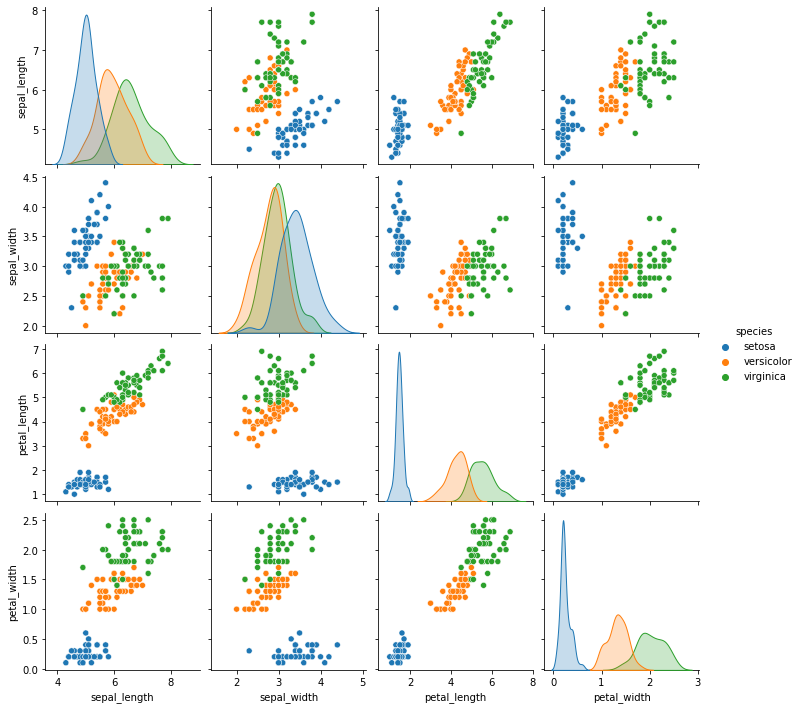

In [8]:
sns.pairplot(df, hue="species");

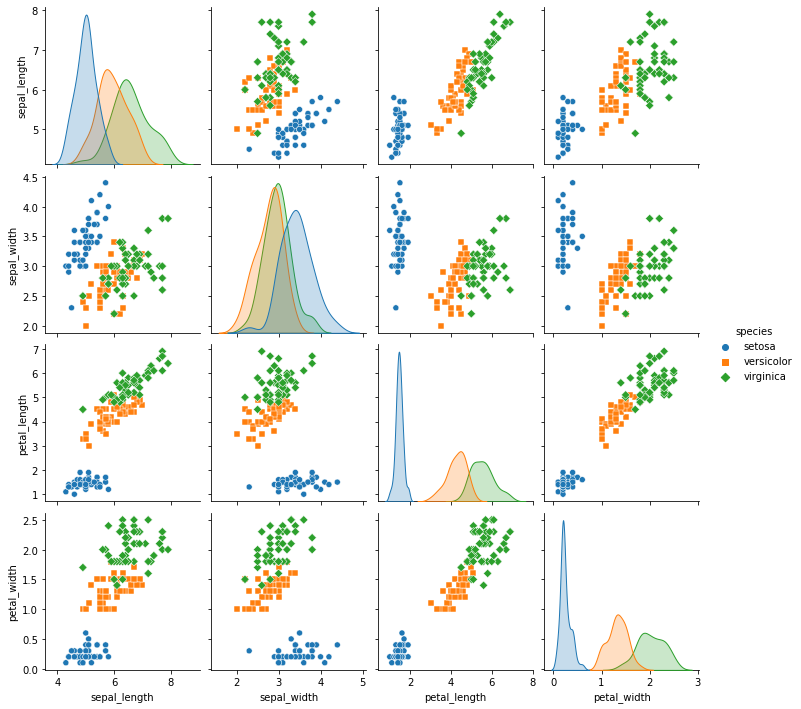

In [10]:
#Farklı işaretler kullanımı markers
sns.pairplot(df, hue="species", markers=["o","s","D"]);

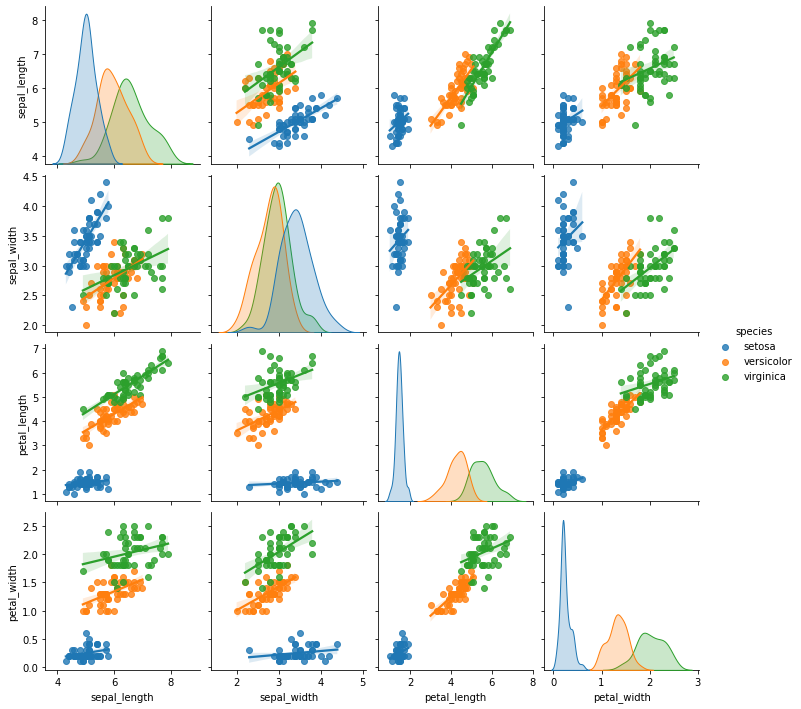

In [13]:
sns.pairplot(df, kind="reg", hue="species");

## Isı Heritası (Heatmap)

Veri Seti Hikayesi

In [33]:
import seaborn as sns
flights = sns.load_dataset("flights")
df=flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [34]:
df.shape

(144, 3)

In [35]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [36]:
#X=Month, y=year, sürekli değişken
df=df.pivot("month","year","passengers");
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


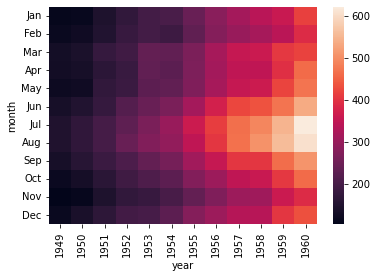

In [37]:
sns.heatmap(df);

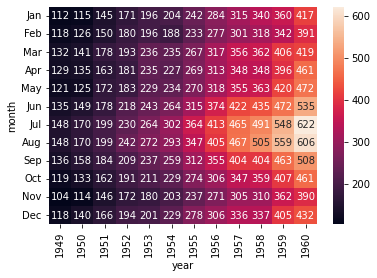

In [38]:
sns.heatmap(df, annot=True, fmt="d");

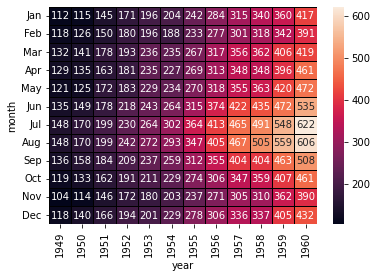

In [40]:
sns.heatmap(df, annot=True, fmt="d", linewidths=.5, linecolor="black");

## Çizgi Grafik

In [41]:
import seaborn as sns
fmri =sns.load_dataset("fmri")
df=fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [42]:
df.shape #kaç gözlem birimi var?

(1064, 5)

In [43]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [44]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [45]:
#Her zaman noktasında eşit sinyal mi var
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [47]:
#Sinyaller tekik mi?
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [48]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi Grafik ve Çaprazlama

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


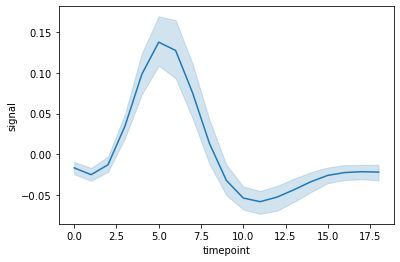

In [49]:
sns.lineplot("timepoint",y="signal",data=df);

Somut çizgiler ortalama değerlere karşılık geliyor (54 değerin ortalaması)

Etrafındaki kısım std ile oluşturulmuş güven aralığı.

_____________________________________________________________

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


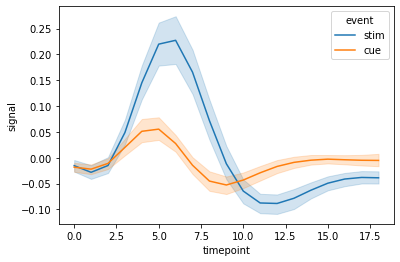

In [51]:
sns.lineplot("timepoint",y="signal", hue="event",data=df);

Grafiğin pik yapan kısımlarda kategorik değişkenin etkisi görülmekte.

_____________________________________________________________________

In [53]:
df.columns

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


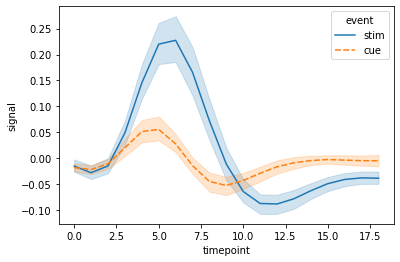

In [54]:
sns.lineplot("timepoint",y="signal", hue="event",style="event",data=df);

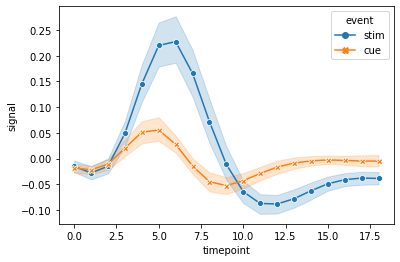

In [58]:
#Ortalamaları belirginleştirelim
sns.lineplot(x="timepoint",
             y="signal", 
             hue="event",
             style="event",
             markers=True,
             dashes=False,
             data=df);

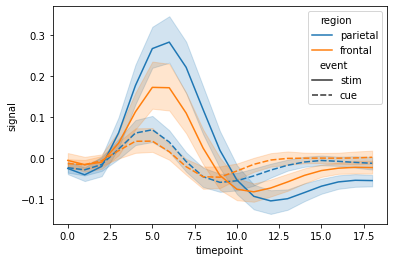

In [59]:
#Ortalamaları belirginleştirelim
sns.lineplot(x="timepoint",
             y="signal", 
             hue="region",
             style="event",
             
             data=df);

## Basit Zaman Serisi Grafiği

In [61]:
!pip install pandas_datareader
import pandas_datareader as pr

In [65]:
df=pr.get_data_yahoo("AAPL", start="2016-01-01", end="2019-08-25");

In [66]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.251438
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.643715
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.181011
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.202665
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.320072


In [67]:
df.shape

(917, 6)

In [68]:
kapanis=df["Close"]

In [69]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

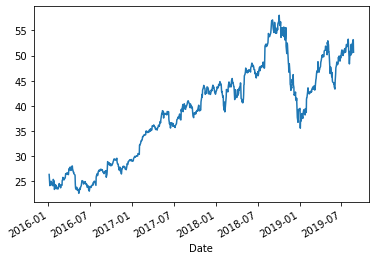

In [70]:
kapanis.plot()

In [71]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [73]:
import pandas as pd
#İndex olarak tarih değilse
kapanis.index=pd.DatetimeIndex(kapanis.index)

In [74]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

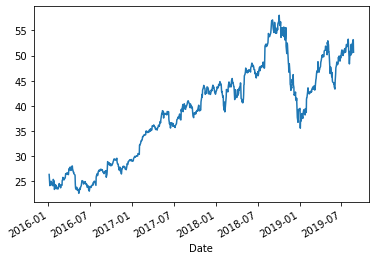

In [76]:
#Basit zaman serisi grafiği
kapanis.plot();